In [54]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [55]:
df =pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')

In [56]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [57]:
df.shape

(1000, 2)

In [58]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [59]:
df.duplicated().any()

np.True_

In [60]:
df.drop_duplicates(inplace=True)

In [64]:
df.duplicated().any()

np.False_

In [65]:
## Check for imbalamce in a data 
df['Liked'].value_counts()

Liked
1    499
0    497
Name: count, dtype: int64

In [66]:
##Create the length of all cHaracter
df['word_count']= df['Review'].apply(lambda x: len(x))

In [67]:
df.head()

,Review,Liked,word_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Review      996 non-null    object
 1   Liked       996 non-null    int64 
 2   word_count  996 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 31.1+ KB


In [69]:
df['character_count']=df['Review'].apply(lambda x: len(x.split(' ')))

In [70]:
df.head()

,Review,Liked,word_count,character_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [71]:
##Average for positive and negative reviews
df[df['Liked']==1]['word_count'].mean()

np.float64(55.95591182364729)

In [72]:
df[df['Liked']==0]['word_count'].mean()

np.float64(60.9738430583501)

In [73]:
df.groupby('Liked')['word_count'].mean()

Liked
0    60.973843
1    55.955912
Name: word_count, dtype: float64

In [74]:
## Clean the text 

In [75]:
import re

In [76]:
df['Review'][4]

'The selection on the menu was great and so were the prices.'

In [77]:
##Replace all non alphabetic with space

In [78]:
review=re.sub('[^a-zA-Z]',' ',df['Review'][4])

In [79]:
review

'The selection on the menu was great and so were the prices '

In [80]:
review= review.lower()

In [81]:
review

'the selection on the menu was great and so were the prices '

In [82]:
review=review.split()

In [83]:
review

['the',
 'selection',
 'on',
 'the',
 'menu',
 'was',
 'great',
 'and',
 'so',
 'were',
 'the',
 'prices']

In [84]:
from nltk.corpus import stopwords

In [85]:
all_stopwords=stopwords.words('english')

In [86]:
all_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [87]:
review=[word for word in review if word not in all_stopwords]

In [88]:
review

['selection', 'menu', 'great', 'prices']

In [89]:
pip install nltk

In [90]:
import nltk

In [91]:
from nltk.stem.porter import PorterStemmer

In [92]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LETSOELASELLO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
review = [ PorterStemmer().stem(word) for word in review ]

In [94]:
review

['select', 'menu', 'great', 'price']

In [95]:
review=" ".join(review)

In [96]:
review

'select menu great price'

In [97]:
import re

In [98]:
custom_stopwords = {'don','dont', 'aint','aren',"aren't", 'couldn',"couldn't",'didn',"didn't", 'wasn',"wasn't", "won't",'won',"wouldn't"}

In [99]:
stopwords = set(stopwords.words('english')) - custom_stopwords

In [100]:
ps = PorterStemmer()

def preprocess_review(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords]
    return " ".join(review)
    
df['processed_text']=df['Review'].apply(preprocess_review)


In [101]:
df['processed_text']

0                                         wow love place
1                                             crust good
2                                     tasti textur nasti
3      stop late may bank holiday rick steve recommen...
4                                select menu great price
                             ...                        
995                        think food flavor textur lack
996                               appetit instantli gone
997                         overal impress would go back
998    whole experi underwhelm think go ninja sushi n...
999    wast enough life pour salt wound draw time too...
Name: processed_text, Length: 996, dtype: object

In [102]:
df.head()

,Review,Liked,word_count,character_count,processed_text
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust good
2,Not tasty and the texture was just nasty.,0,41,8,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


In [103]:
####Display Word cloud

In [104]:
from wordcloud import WordCloud

In [105]:
wc= WordCloud(width = 500,height = 500,min_font_size=8,background_color='white')

In [106]:
pos=wc.generate(df[df['Liked']==1]['processed_text'].str.cat(sep = ' '))

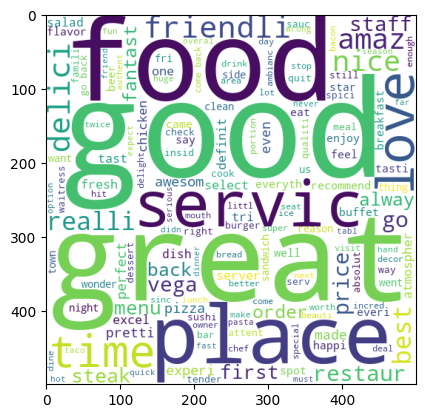

In [107]:
plt.imshow(pos)

In [108]:
neg=wc.generate(df[df['Liked']==0]['processed_text'].str.cat(sep = ' '))

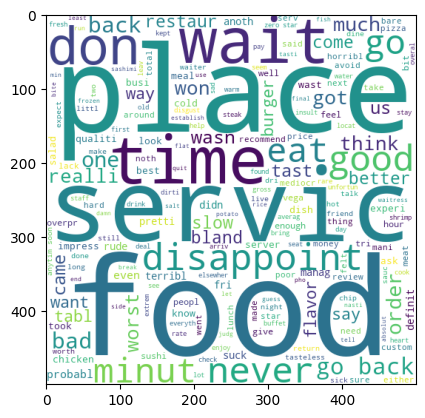

In [109]:
plt.imshow(neg)

In [110]:
df.head()

,Review,Liked,word_count,character_count,processed_text
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust good
2,Not tasty and the texture was just nasty.,0,41,8,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


In [111]:
### Perfoming count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
cv = CountVectorizer(max_features = 1500)

In [113]:
X=cv.fit_transform(df['processed_text']).toarray()

In [114]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(996, 1500))

In [115]:
X.shape

(996, 1500)

In [116]:
y = df['Liked']

In [117]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 996, dtype: int64

In [118]:
## split data intpo training and testing 
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state = 42)

In [120]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((796, 1500), (200, 1500), (796,), (200,))

In [121]:
from sklearn.naive_bayes import GaussianNB

In [122]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [123]:
y_pred1 = nb.predict(X_test)

In [124]:
y_pred1

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1])

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
accuracy_score(y_test,y_pred1)

0.64

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [129]:
y_pred2 = lr.predict(X_test)

In [130]:
accuracy_score(y_test,y_pred2)

0.765

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
y_pred3 = rf.predict(X_test)

In [134]:
accuracy_score(y_test, y_pred3)

0.76

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [136]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [137]:
y_pred4 = dt.predict(X_test)

In [138]:
accuracy_score(y_test,y_pred4)

0.725

In [139]:
### Save OUR best model

In [144]:
import joblib

In [145]:
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']

In [146]:
###Using the Model

In [147]:
model=joblib.load('Restaurant_review_model')

In [ ]:
pred = model.predict([0])